<center> 
# R406: Using Python for data analysis and modelling

<br> <br> 

## Lecture 10: Symbolic computing with SymPy

<br>

<center> **Andrey Vassilev**

<br> 

<center> **2016/2017**
 

# Outline

1. Introduction
2. Basic SymPy objects and operations
3. Applications of specific modules
    - calculus - limits, derivatives, integrals
    - linear algebra
    - solving equations
    - statistics
    - plotting? 

# Introduction: what is SymPy?

- SymPy is a Python library for computer algebra/symbolic computing.
- Roughly speaking, this means that you can use it to perform computations in a pen-and-paper manner, getting symbolic expressions rather that numbers as a result.
- SymPy is similar to other CAS like Mathematica, Maple, Matlab's Symbolic Math Toolbox or Maxima.
- SymPy is designed to be equally usable interactively or programmatically as a part of a larger workflow.
- See [this paper](https://peerj.com/articles/cs-103/) or the official [documentation](http://docs.sympy.org/latest/index.html) for more information.

# SymPy basics

Here is a simple example to illustrate the difference between "regular" computations and symbolic ones.

In a standard use case, we define variables and perform manipulations on them to get numerically evaluated results.

In [1]:
x = 2
y = 5
z = x**2 - y**3
z

-121

Notice that the third assignment, `z = x**2 - y**3`, binds the variable `z` to the specific, evaluated result, -121 in this case. There is no idea of keeping the expression $x^2-y^3$ as such.

Here is how the same operations work in symbolic form:

In [2]:
import sympy as sym
x,y = sym.symbols('x y')
z = x**2 - y**3
z

x**2 - y**3

The `symbols` function does just that — create Symbol objects `x` and `y` holding the symbols "x" and "y". There is nothing to prevent you from defining the objects to represent different symbols but it is confusing and discouraged by convention:

In [3]:
a,b = sym.symbols("X, Y") # Notice we can separate with commas as well
print(a**2+b**4)
del a,b

X**2 + Y**4


If you are disciplined enough to conform to the above convention, you can make use of the `var()` function, which creates Symbol objects with the same name as the arguments:

In [4]:
sym.var("x1 x2 x3")
x1

x1

Obviously, more complicated expressions can be constructed but these can be difficult to read:

In [5]:
z = (sym.sqrt(x)+sym.exp(y**2)*sym.cos(x+sym.pi))/(x**(sym.ln(y))+y**5)
# Note that SymPy offers symbolic versions of different functions
# like sqrt, exp etc.
z

(sqrt(x) - exp(y**2)*cos(x))/(x**log(y) + y**5)

For that reason, SymPy offers pretty-printing functionality using available engines such as LaTeX or Matplotlib.

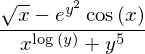

In [6]:
sym.init_printing()
z

For the LaTeX fans out there, you can also access the $\LaTeX$ code representing an expression by using the `latex()` function:

In [7]:
print(sym.latex(z))

\frac{\sqrt{x} - e^{y^{2}} \cos{\left (x \right )}}{x^{\log{\left (y \right )}} + y^{5}}


SymPy is clever enough to try to simplify expressions when you combine them:

In [8]:
z1 = x**2 - 4*x*y - 5*y**3
z2 = 3*x**2 + x*y + 4*y**3

In [9]:
z2+z1

Note that if you want to pretty print several objects in the same cell, you need to import `display` from `IPython.display`.

In [10]:
from IPython.display import display
display(z1)
display(z2)
display(z1+z2)

Symbols can also be created in "packaged" form, i.e. placed in a suitable container:

In [11]:
SymList = sym.symbols(['a', 'b', 'c', 'd'])
display(SymList)
display(SymList[1])

In [12]:
SymSet = sym.symbols({'a', 'b', 'c', 'd'})
display(SymSet)
sym.symbols('a') in SymSet

True

If you need to create many symbols, there is range syntax to reduce typing:

In [47]:
ST = sym.symbols("x1:10")
ST

In [48]:
ST[0]**2+sym.exp(ST[3])

In [49]:
ST = sym.symbols("a:g")
ST

In [50]:
# Don't forget to clean up before you leave
del SymList, SymSet, ST

Let's see what we can do with symbols and symbolic expressions.

# Substitution

It is possible to perform substitutions using the `subs()` method:

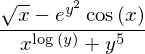

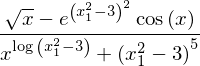

In [58]:
display(z)
z.subs(y,x1**2-3)

We can also substitute specific numeric values:

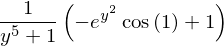

In [62]:
z.subs(x,1)
# Note that cos(1) below is not evaluated

In [63]:
z.subs({x:1,y:0}) # Equivalently: z.subs([(x,1),(y,0)])

# Evaluation

Notice that SymPy will simplify expressions when it can but will not evaluate in general: in the preceding example `cos(1)` remained unevaluated. We can require evaluation to a floating point number by using the `evalf()` method. 

In [71]:
sym.cos(1)

In [84]:
sym.cos(1).evalf()

In [85]:
type(sym.cos(1).evalf()) # The type is a special SymPy float

sympy.core.numbers.Float

In [86]:
type(float(sym.cos(1).evalf())) # But it is convertible to a regular float

float

Some more examples:

In [73]:
sym.cos(sym.pi/2) # Note the symbolic constant pi

In [77]:
type(sym.cos(sym.pi/2))

sympy.core.numbers.Zero

In [70]:
sym.sqrt(9)

In [75]:
sym.sqrt(5)

In [76]:
sym.sqrt(5).evalf()

# From strings to expressions

A string can be converted into an expression using the `sympify()` function, provided that you are willing to risk an `eval()` call, which is performed internally. 

**Note the name of the function: it's `sympify` = "make a SymPy object", NOT `simplify` = "make simpler", which is another SymPy function!**

In [89]:
sym.sympify("a**2 + a*b + b**3")

In [89]:
sym.sympify("a**2 + a*b + b**3")

# Evaluating at many points

Sometimes you may want to take an expression and evaluate it for an entire array of values. This can be done efficiently with the `lambdify()` function. As the name hints, `lambdify()` produces a lambda function that is usable with a numerical package, usually NumPy.

In [116]:
import numpy as np
a = np.arange(-5,5)

In [117]:
expr = z2.subs(y,sym.exp(x))
expr

In [119]:
# Produce a NumPy-compatible lambda function from expression expr,
# treating the expression as a function of x
f = sym.lambdify(x,expr,modules="numpy") 
f(a)

array([  7.49663115e+01,   4.79267620e+01,   2.68511324e+01,
         1.17392444e+01,   2.83126883e+00,   4.00000000e+00,
         8.60604295e+01,   1.64049329e+03,   3.24995923e+04,
         6.51285558e+05])

# Simplification

This is performed by the `simplify()` function. Here it is in action:

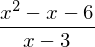

In [123]:
expr = (x**2-x-6)/(x-3)
display(expr)
sym.simplify(expr)

In [126]:
sym.simplify( sym.factorial(x)/sym.factorial(x-2) )

- While simplification is intuitive and obvious in simple cases, there is no universal, mathematically rigorous way to do it in general.
- As a result, `simplify()` is implemented to try various heuristics to make an expression "simple" according to its internal criteria but:
    - it can be slow;
    - it is not guaranteed to deliver a result;
    - the result may not be what you expect or what can be obtained by pen-and-paper calculations.

- SimPy has more specialized simplification routines to handle particular cases.
- Thus, you are advised to use `simplify()` in cases where you don't exactly know what is happening and are trying to clean up an expression a little.

Two specialized types of simplification routines are given by the `factor()` and `expand()` functions.

In [128]:
sym.factor( x**3-3*x**2-33*x+35 )

In [129]:
sym.expand( (x-5)**3 )

The `collect()` function groups together common powers of a variable:

In [134]:
x,y,z = sym.symbols('x y z')
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
display(expr)
sym.collect(expr,x)

You can also use the `coeff()` method — whose syntax is `expr.coeff(x, n)` — to extract the coefficient in front of a particular power `n` from expression `expr`.

In [135]:
sym.collect(expr,x).coeff(x,2)

The `cancel()` function does what its name suggests:

In [138]:
sym.cancel((x**3 + 2*x**2 - 5*x - 6)/(x**2 - x - 2))

In many cases you can use `factor()` to achieve the same but according to the documentation `cancel()` is more efficient.

In [137]:
# PLACEHOLDER
print(sym.expand((x-2)*(x+1)))
# Eq(x + 1, 4)
# There is also a method called equals that tests if two expressions are equal by evaluating them numerically at random points.
# a.equals(b)

x**2 - x - 2
